# Feature Engineering Compendium

This notebook contains notes and examples of some of the different feature engineering methods that I encounter in my free time. Essentially, this is a space for me to keep them for future use, as well as try them in practice. This practice also helps me remember the methods and understand them better. Hope you learn something from this as well!

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## Feature Selection
This section contains some of the methods which help pick features and understand their importance in predicting the target variable.

### Mutual Information
Mutual information (MI) is a great general-purpose metric and is especially useful at the start when you might not know what model you would like to use. MI between two quantities measures the extent to which knowledge about one quantity reduces uncertainity about the other. Uncertainty is measured using a quantity from information theory known as 'entropy'. The entropy of a variable roughly means: "how many yes or no questions you would need to describe an occurrence of that variable, on average". The more questions you have to ask, the more uncertain you are about the variable. Mutual information is how many questions you expect the feature to answer about the target. Least possible score is 0.0. In theory, there is no limit; in practice, it is rare to get a value about 2.0. MI is logarithmic, so its rate of increase is slow. 

| Pros | Cons |
| ---- | ---- |
| Easy to use and interpret | Univariate (can't detect interactions between features) |
| Computationally efficient | Actual usefulnes still depends on the model. May need to transform a feature, as a result |
| Theoretically well-founded | |
| Resistant to overfitting | |
| Can detect any kind of relationship | |

Scikit-learn's implementation of MI treats discrete and continous variables differently. So, when using their implementation, make sure to specify which variables are discrete. This is done by passing a list argument in the `discrete` parameter of the function.

In [7]:
from sklearn.feature_selection import mutual_info_classif

In [69]:
water_df = pd.read_csv("datasets/water_quality.csv")
water_df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [70]:
X = water_df.copy()
y = X.pop("is_safe")

In [77]:
mi_scores = mutual_info_classif(X, y, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Score", index=X.columns)
mi_scores.sort_values(ascending=True, inplace=True)

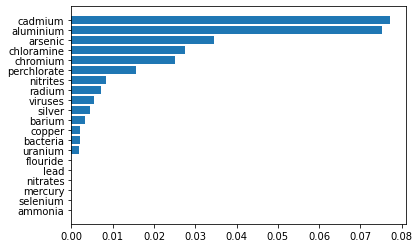

In [78]:
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.show()

<AxesSubplot:xlabel='is_safe', ylabel='cadmium'>

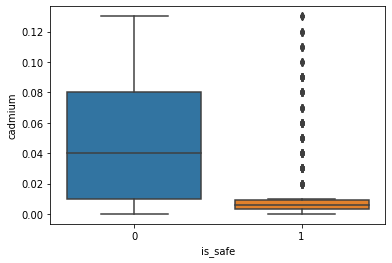

In [61]:
sns.boxplot(x="is_safe", y="cadmium", data=water_df)

<AxesSubplot:xlabel='is_safe', ylabel='ammonia'>

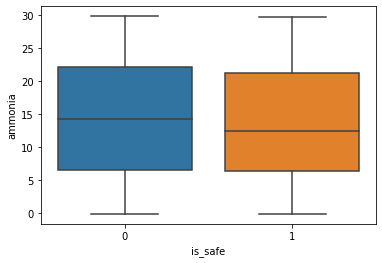

In [79]:
sns.boxplot(x="is_safe", y="ammonia", data=water_df)

Note that ammonia may still be an interaction variable (valuable in combination with another variable), so it is good to investigate this during actual analysis. This may also be the case for all of the other variables.